In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from src.data.data_loader import OpenMLDataLoader
from src.data.dataset_interface import DataInterface
from src.eda.eda import print_basic_info
from src.log_reg_ccd import LogRegCCD
from src.utils import plot_lasso_path, evaluate_model
import src.measures as measure

In [2]:
DATASET_NAME = 'arrhythmia'

In [3]:
data_loader = OpenMLDataLoader(dataset_name=DATASET_NAME, version=1)
data_interface = DataInterface(data_loader=data_loader, dataset_name=DATASET_NAME)
data_interface.preprocess_data()
print_basic_info(data_interface.data)

Removed 17 constant features.
Removed 18 correlated features.

Dataset shape:
(452, 244)

Dataset features count:
244

Dataset observation count:
452

Dataset overview:
        age       sex    height    weight  QRSduration  PRinterval  \
0  1.734439 -1.107520  0.641327  0.713814     0.135505    0.844945   
1  0.579312  0.902918 -0.031998 -0.251644    -0.516072    0.420769   
2  0.457720 -1.107520  0.156533  1.618932     3.197915    0.175193   
3  0.518516 -1.107520  0.237332  1.558590     0.721924    1.045871   
4  1.734439 -1.107520  0.641327  0.713814    -0.059968    0.577044   

   Q-Tinterval  Tinterval  Pinterval       QRS  ...  chV5_QRSA  chV5_QRSTA  \
0     0.113709   0.113809   1.201469 -1.094661  ...   0.466295    1.230950   
1     1.013301  -0.588564  -1.977064 -0.191203  ...   0.228885    0.431593   
2     0.563505   0.422853   0.464980  1.373324  ...  -0.385946    0.628358   
3     0.383587   0.254284   2.054247 -0.125096  ...   1.154176    1.440012   
4    -0.216141   0.1

In [4]:
data_interface.split_data()
data = data_interface.get_data()
X_train, y_train = data['train_data'].values, data['train_labels'].values
X_test, y_test = data['test_data'].values, data['test_labels'].values
X_valid, y_valid = data['val_data'].values, data['val_labels'].values

In [5]:
ccd = LogRegCCD(verbose=False)
ccd.fit(X_train, y_train, lam_max=0.5, lam_count=20)
y_pred = ccd.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.4f}")

Train accuracy: 0.6389


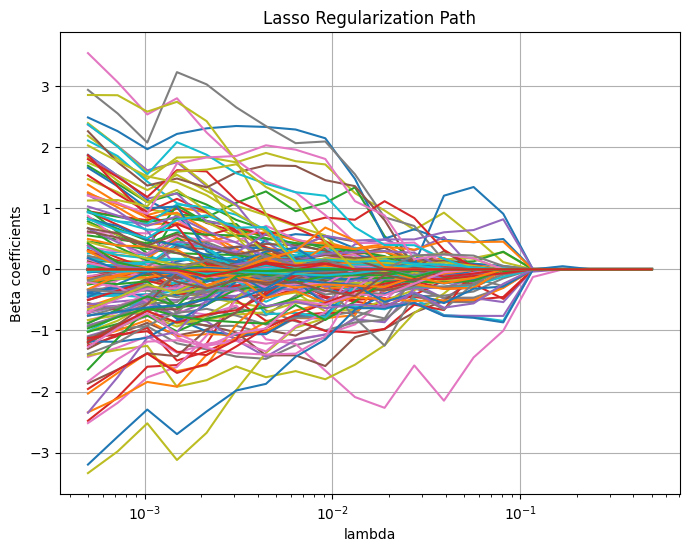

In [6]:
ccd.plot_lasso_path()

In [7]:
print(ccd.best_beta)

[ 3.94428931e-01  1.28522012e-01  4.75990257e-02 -0.00000000e+00
  6.08775015e-03 -2.28280530e-01 -0.00000000e+00 -0.00000000e+00
 -1.24094850e-01  6.48913574e-01 -3.07134198e-02 -0.00000000e+00
 -0.00000000e+00 -1.86558490e-02  0.00000000e+00  0.00000000e+00
  1.04051278e-01  0.00000000e+00 -6.41572628e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.22957098e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -5.75046807e-01 -0.00000000e+00  5.15135537e-02 -0.00000000e+00
 -2.39346266e-01 -0.00000000e+00 -9.33449817e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.81211463e-01  6.57484804e-01 -0.00000000e+00  2.83857328e-02
 -4.50950441e-01  8.81169519e-03 -5.65239737e-03  0.00000000e+00
  7.11422016e-01  2.85906575e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  4.13495777e-02
  2.95029222e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.02491062e-02 -0.00000

## Validation

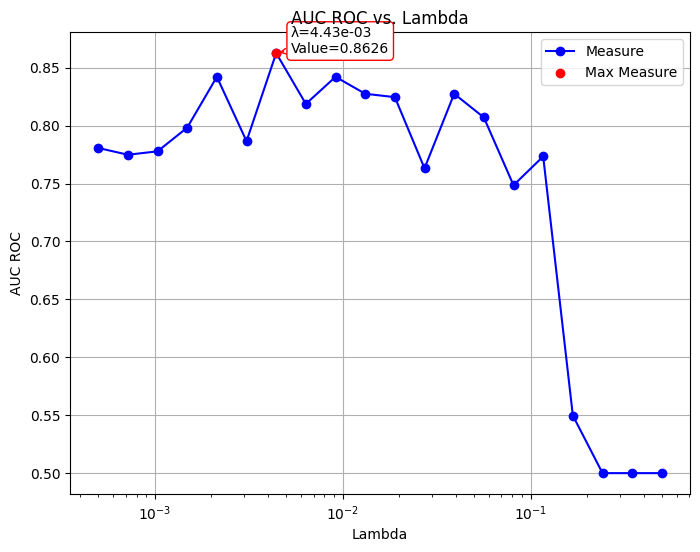

Validation Accuracy: 0.7838
Best Beta: [ 6.01378948e-01  2.53531348e-01  5.70559806e-01 -0.00000000e+00
  3.65162307e-01 -3.70855374e-01 -9.89399142e-01 -4.22593455e-01
 -7.53338078e-01  1.90751387e+00 -2.80765310e-02 -7.59709127e-02
  8.58893256e-02  3.16166951e-01 -1.40593757e-01 -2.14859733e-01
  2.15209492e-01 -9.68393120e-02 -1.05494285e+00  4.01206919e-02
 -2.08333853e-01 -7.56892236e-02  3.51028281e-01  1.27647735e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.69632723e-03
 -1.46530334e+00 -1.36678592e+00  4.51415958e-01 -0.00000000e+00
 -1.10789143e-01 -1.40878877e-02 -1.02641153e+00 -0.00000000e+00
 -0.00000000e+00 -4.03988294e-02  1.82183716e-02  2.75121884e-01
 -5.29396751e-01  2.33304747e+00 -1.67794461e-01  5.09509372e-01
 -4.70760966e-01  1.46445174e-01 -2.28947141e-02  0.00000000e+00
  2.34667777e+00  8.84753419e-01 -1.96753102e-02  3.57700553e-02
  0.00000000e+00 -1.97357907e-02  3.51750734e-01 -0.00000000e+00
  3.44378474e-02 -1.02419219e-01 -1.53958123e-01  1

In [8]:
ccd.plot(X_valid, y_valid, measure=measure.AUCROC())
ccd.validate(X_valid, y_valid, measure=measure.AUCROC())
y_pred = ccd.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Best Beta: {ccd.best_beta}")

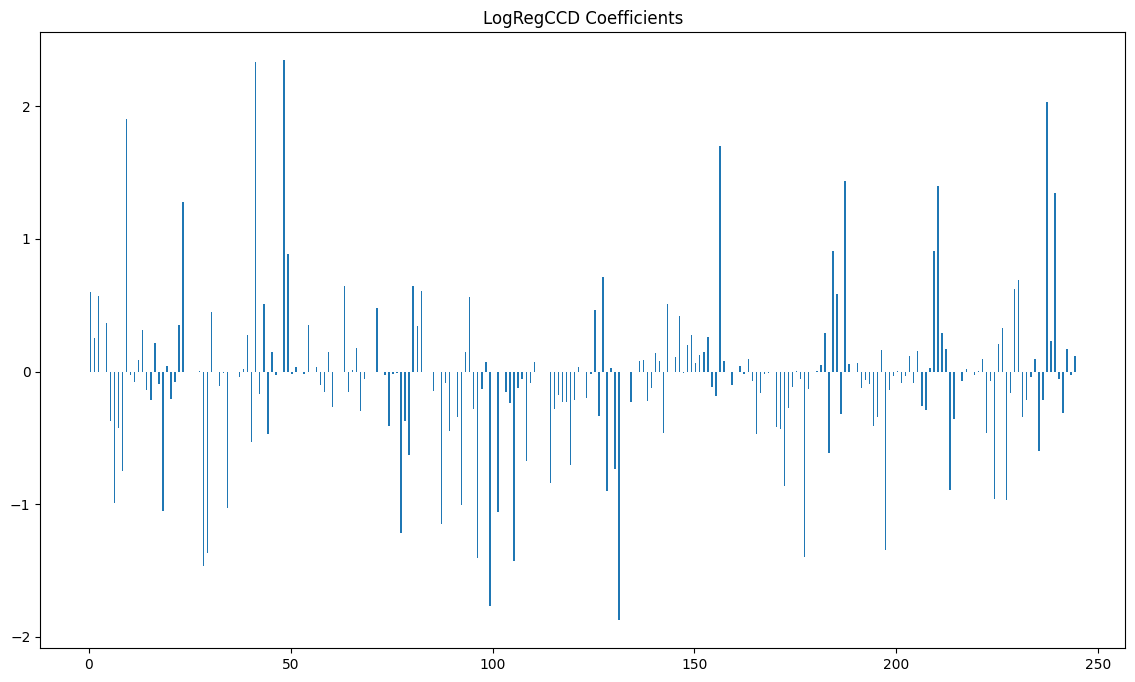

In [9]:
ccd_coefs = ccd.best_beta
n_features = len(ccd_coefs)

indices = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(indices + bar_width, ccd_coefs, bar_width)
plt.title('LogRegCCD Coefficients')
plt.show()

In [10]:
ccd_coefs = ccd.best_beta[1:]
top_5_indices = np.argsort(np.abs(ccd_coefs))[-5:]
feature_names = data_interface.get_feature_names()
top_5_features = [(feature_names[i], ccd_coefs[i]) for i in top_5_indices]

top_5_features_df = pd.DataFrame(top_5_features, columns=["Feature", "Coefficient"])

print("Top 5 most important features based on coefficients:")
display(top_5_features_df)

Top 5 most important features based on coefficients:


,Feature,Coefficient
0,chV5_Rwave,-1.874988
1,Pinterval,1.907514
2,chV6_JJwaveAmp,2.032085
3,chDIII_Swave,2.333047
4,chDIII_DD_RPwaveExists,2.346678


## Comparison with LogisticRegression

In [11]:
lr = LogisticRegression(penalty=None, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {accuracy:.4f}")

Train Accuracy: 1.0000


In [12]:
print(lr.coef_)

[[  0.26703165   9.76510743  -3.45301028   4.00830837  -1.24673605
  -17.51939832 -19.11436755  -7.52746573  26.29675297   7.09300363
   19.96693537  11.62271646  15.20276246  -5.94506678 -15.45285494
    3.69254093  -5.26700225 -10.98966827   7.2563067  -12.07287458
   -7.14273547   8.0938879    8.9664588    0.59186277  -0.30648062
   -0.71163248  11.53561057 -19.14692096 -32.57065563  13.245384
    0.262462    -2.43123567   5.91606831 -17.72212482   0.41804594
    4.42294991   1.36957625  -2.75543463   9.6974173  -11.28768582
   21.68381792  -9.23103952  16.89461066   5.7405891    6.63624407
   -2.08305321   4.98667013  29.79390261  15.54435001  -6.80758551
    2.79609489  17.75291034   3.23247145  10.25875073   7.27892033
   -2.40866409  -2.45742705  -9.5379114    3.24172337  -8.006039
   -0.66123939  -1.87909729  15.57051001   5.84814113  12.56621105
    3.5767498   -0.77438131  -4.5709088    8.28600138   0.41804594
    5.5452712   -0.69882224  -1.82359091 -15.40716165  -6.30601786

In [13]:
y_pred = lr.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.7297


In [22]:
ccd_metrics = evaluate_model(ccd, X_test, y_test, "LogRegCCD")
lr_metrics = evaluate_model(lr, X_test, y_test, "LogisticRegression")

print(f"LogRegCCD accuracy: {accuracy_score(y_test, ccd.predict(X_test))}")
print(f"LogisticRegression accuracy: {accuracy_score(y_test, lr.predict(X_test))}")

results = pd.DataFrame({
    'Metric': ['ROC AUC', 'PR AUC', 'F1 Score', 'Balanced Accuracy'],
    'LogRegCCD': [ccd_metrics['ROC AUC'], ccd_metrics['PR AUC'],
                  ccd_metrics['F1 Score'], ccd_metrics['Balanced Accuracy']],
    'LogisticRegression': [lr_metrics['ROC AUC'], lr_metrics['PR AUC'],
                           lr_metrics['F1 Score'], lr_metrics['Balanced Accuracy']]
})

results.to_csv(f'./results/{DATASET_NAME}.csv', index=False)

print("\nPerformance Comparison:")
display(results)

LogRegCCD accuracy: 0.6703296703296703
LogisticRegression accuracy: 0.6263736263736264

Performance Comparison:


,Metric,LogRegCCD,LogisticRegression
0,ROC AUC,0.681818,0.666103
1,PR AUC,0.594730,0.569544
2,F1 Score,0.693878,0.630435
3,Balanced Accuracy,0.673598,0.627418


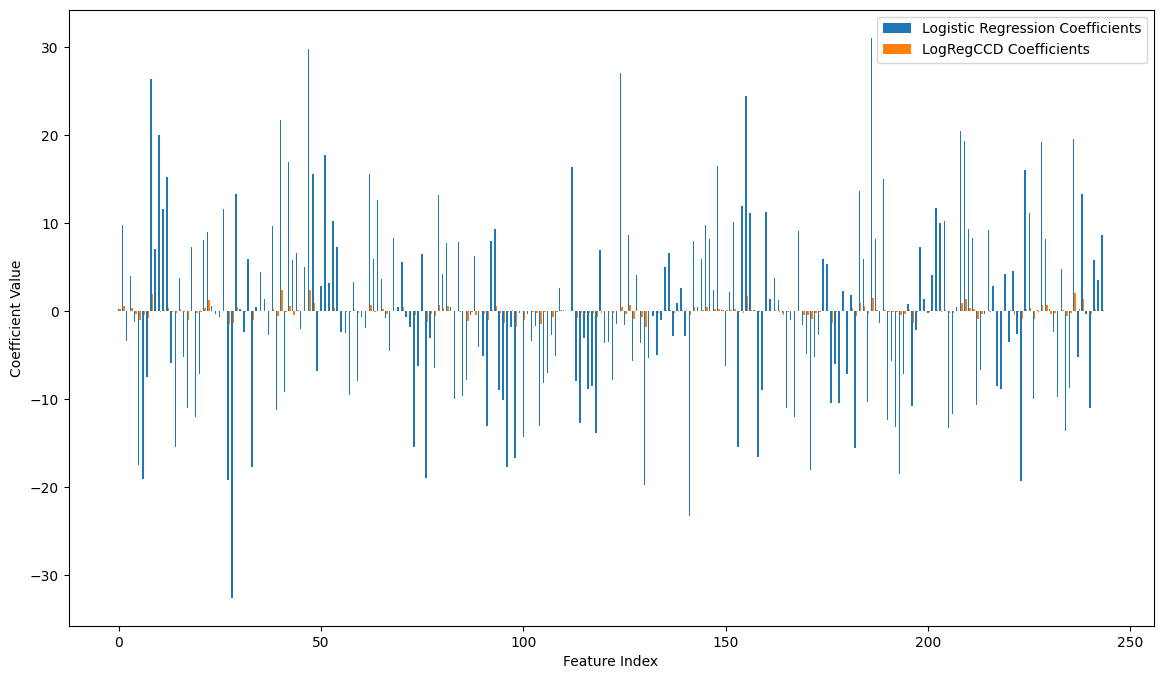

In [15]:
lr_coefs = lr.coef_[0]
ccd_coefs = ccd.best_beta[1:]
n_features = len(lr_coefs)
indices = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(indices, lr_coefs, bar_width, label='Logistic Regression Coefficients')
plt.bar(indices + bar_width, ccd_coefs, bar_width, label='LogRegCCD Coefficients')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()


In [23]:
nonzero_elements = np.count_nonzero(ccd.best_beta)
total_features = len(ccd.best_beta)
reduced_features = total_features - nonzero_elements

print(f"Number of reduced features by regularization: {reduced_features}")

Number of reduced features by regularization: 34


## Comparisons with library regularizations

In [16]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=10)
lr_l1.fit(X_train, y_train)
y_pred = lr_l1.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {accuracy:.4f}")

y_pred = lr_l1.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Train Accuracy: 1.0000
Validation Accuracy: 0.6486


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_values = 1/ccd.lambdas
best_C = None
best_accuracy = 0

for C in C_values:
    lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    lr_l1.fit(X_train, y_train)
    y_pred = lr_l1.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"Best C: {best_C:.4f}, Best Validation Accuracy: {best_accuracy:.4f}")

Best C: 2.8769, Best Validation Accuracy: 0.7027


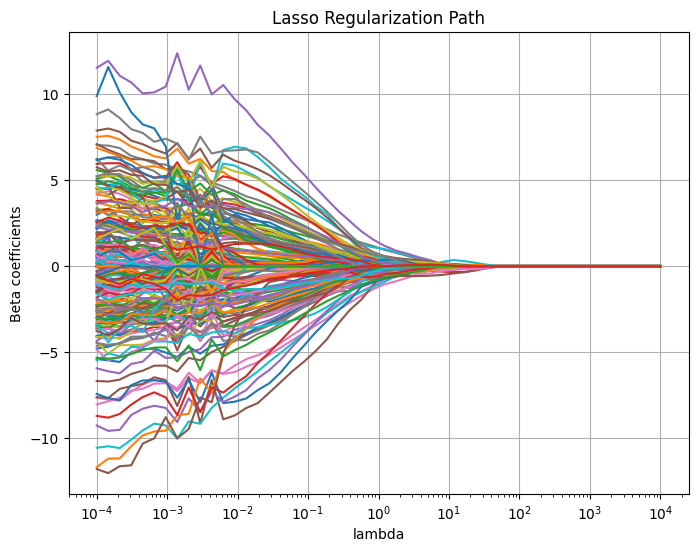

In [18]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

n = data_interface.data.data.shape[0]
lr_cv = LogisticRegressionCV(
    Cs=50,
    cv=10,
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)
lr_cv.fit(X_train, y_train)

alphas_lasso = 1/lr_cv.Cs_
coefs_lasso = lr_cv.coefs_paths_[1][0, :, 1:] # For fold 0 for simplicity
coefs_lasso = coefs_lasso.transpose()
plot_lasso_path(alphas_lasso, coefs_lasso)

In [19]:
def find_biggest_coef(coefs, alphas, alpha_min, alpha_max, type='ccd'):
    mask = (alphas >= alpha_min) & (alphas <= alpha_max)
    if type == 'ccd':
        filtered_coefs = coefs[mask, 1:]
    else:
        filtered_coefs = coefs[:, mask]

    max_coefs = np.max(np.abs(filtered_coefs), axis=1)
    most_important_feature_index = np.argmax(max_coefs)

    return most_important_feature_index, max_coefs[most_important_feature_index]

alpha_min = 10**-2
alpha_max = 10**-1

In [20]:
most_important_feature_index, max_coef = find_biggest_coef(coefs_lasso, alphas_lasso, alpha_min, alpha_max, 'lasso')
most_important_feature_name = feature_names[most_important_feature_index]

print("LogRegCCD:")
print(f"Feature with the biggest coefficient for {alpha_min} < lambda < {alpha_max}: {most_important_feature_name} ({most_important_feature_index})")
print(f"Maximum coefficient value: {max_coef}")

LogRegCCD:
Feature with the biggest coefficient for 0.01 < lambda < 0.1: chDII_RwaveAmp (154)
Maximum coefficient value: 9.06588335661377


In [21]:
most_important_feature_index, max_coef = find_biggest_coef(ccd.betas, ccd.lambdas, alpha_min, alpha_max)
most_important_feature_name = feature_names[most_important_feature_index]

print("LogRegCCD:")
print(f"Feature with the biggest coefficient for {alpha_min} < lambda < {alpha_max}: {most_important_feature_name} ({most_important_feature_index})")
print(f"Maximum coefficient value: {max_coef}")

LogRegCCD:
Feature with the biggest coefficient for 0.01 < lambda < 0.1: QRSduration (4)
Maximum coefficient value: 2.267614271615758
